In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
base_dir = './data/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

/home/ubuntu/anaconda/envs/py36-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
from keras.utils import plot_model

plot_model(model, to_file="fine_tune_lenet.png", show_shapes=True)

In [6]:
from keras import  optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['acc'])

## Data augmentation applied only on training dataset.

the images presented to the input layer should be square. Using square inputs allows us to take
advantage of linear algebra optimization libraries.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



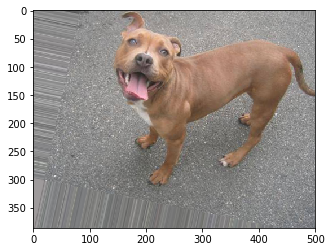

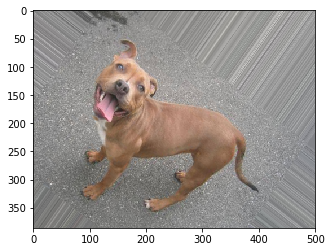

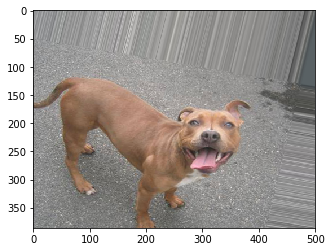

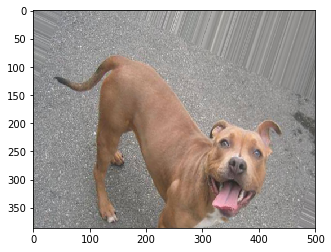

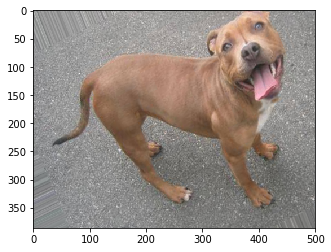

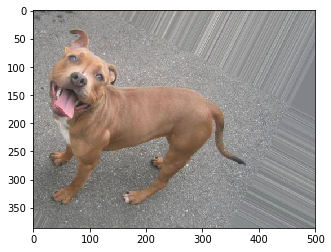

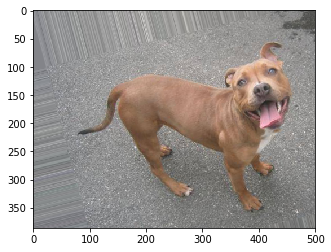

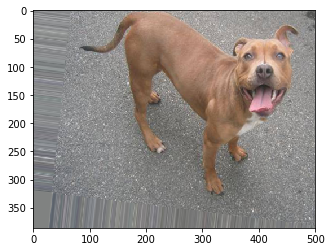

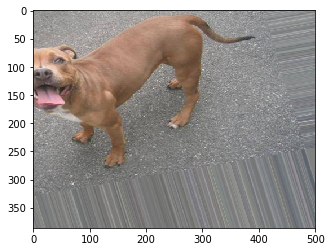

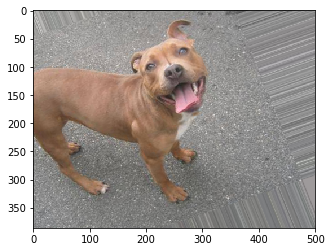

In [8]:
from keras.preprocessing import image

img_path = os.path.join(train_dir, 'dogs/dog.14.jpg')
img = image.load_img(img_path)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

#generates a batch of 10 transformed images.
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 10 == 0:
        break

plt.show()


In [9]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
100/100 [==============================] - 37s 365ms/step - loss: 6.7911 - acc: 0.5241 - val_loss: 4.1670 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 24s 241ms/step - loss: 2.8162 - acc: 0.5500 - val_loss: 1.8257 - val_acc: 0.5830
Epoch 3/100
100/100 [==============================] - 23s 235ms/step - loss: 1.3666 - acc: 0.5556 - val_loss: 1.0341 - val_acc: 0.5360
Epoch 4/100
100/100 [==============================] - 24s 237ms/step - loss: 0.8863 - acc: 0.5703 - val_loss: 0.7721 - val_acc: 0.6260
Epoch 5/100
100/100 [==============================] - 24s 238ms/step - loss: 0.7350 - acc: 0.5978 - val_loss: 0.6720 - val_acc: 0.6380
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6810 - acc: 0.6100 - val_loss: 0.6579 - val_acc: 0.6130
Epoch 7/100
100/100 [==============================] - 24s 241ms/step - loss: 0.6630 - acc: 0.6269 - val_loss: 0.6198 - val_acc: 0.6730
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 24s 238ms/step - loss: 0.4750 - acc: 0.7937 - val_loss: 0.4662 - val_acc: 0.7940
Epoch 62/100
100/100 [==============================] - 24s 243ms/step - loss: 0.4677 - acc: 0.7900 - val_loss: 0.4822 - val_acc: 0.7750
Epoch 63/100
100/100 [==============================] - 24s 236ms/step - loss: 0.4764 - acc: 0.7894 - val_loss: 0.4729 - val_acc: 0.7820
Epoch 64/100
100/100 [==============================] - 25s 250ms/step - loss: 0.4732 - acc: 0.7931 - val_loss: 0.4993 - val_acc: 0.7810
Epoch 65/100
100/100 [==============================] - 24s 235ms/step - loss: 0.4589 - acc: 0.8006 - val_loss: 0.4595 - val_acc: 0.8040
Epoch 66/100
100/100 [==============================] - 23s 233ms/step - loss: 0.4684 - acc: 0.7941 - val_loss: 0.4947 - val_acc: 0.7920
Epoch 67/100
100/100 [==============================] - 24s 243ms/step - loss: 0.4637 - acc: 0.8094 - val_loss: 0.4573 - val_acc: 0.8020
Epoch 68/100
100/100 [===================

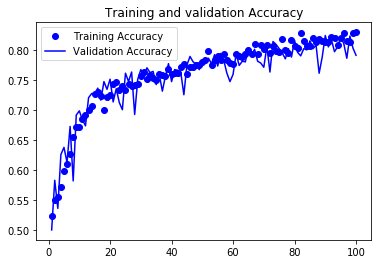

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()

plt.show()

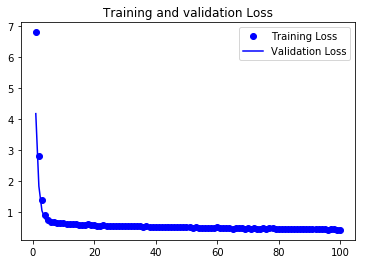

In [12]:
acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Loss')
plt.plot(epochs, val_acc, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()

plt.show()

In [19]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.79200000166893


## Activation Map Visualization

In [13]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(train_dir, 'dogs/dog.4.jpg')
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

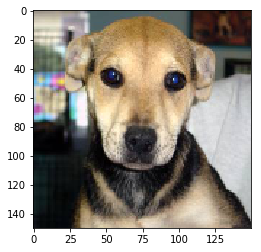

In [14]:
plt.imshow(img_tensor[0])
plt.show()

In [15]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

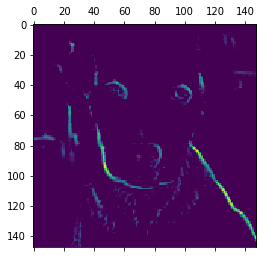

In [16]:
layer_activation = activations[0]
plt.matshow(layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

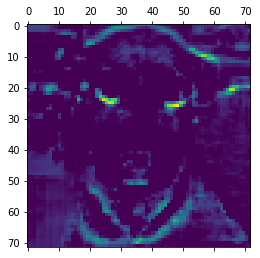

In [17]:
layer_activation = activations[2]
plt.matshow(layer_activation[0, :, :, 13], cmap='viridis')
plt.show()

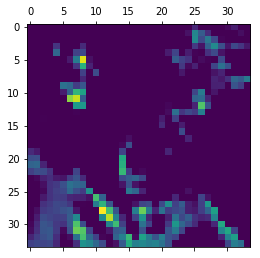

In [18]:
layer_activation = activations[4]
plt.matshow(layer_activation[0, :, :, 60])
plt.show()